# Домашнее задание №1


Задание присылать на обе почты почты **aleksartamonov@gmail.com**  **dashkov.alexander.om@gmail.com** в виде ссылки на colab

В теме письма указать ***CV_HSE_2021 HW1 <Фамилия Имя>***

soft deadline: 14.02.2021T23:59:00+0300

hard deadline: 21.02.2021T23:59:00+0300

## Теоретический блок

##### Задача 1 (3 балла)

Когда Вы заходите в темную комнату из светлого помещения, то проходит некоторое время, прежде чем Вы станете видеть достаточно хорошо, чтобы различить очертания предметов. Какая из обсуждавшихся на лекции особенностей зрительного восприятия человека объясняет это явление? Какой процесс происходит в зрительной системе?



> Данная особенность зрительного восприятия называется темновой адаптацией.
За ночное зрение отвечают палочки (при наличии освещения работают также и колбочки). Они очень чувствительны к свету, что позволяет видеть в условиях очень низкой освещенности (могут реагировать даже на попадание 2-3 фотонов). Цветовое восприятие палочек ограничено изумрудно-зеленой частью спектра, поэтому цветовосприятие у ночного зрения отсутствует. По сравнению со световой адаптацией, занимающей в среднем 1-3 минуты, темновая адаптация происходит дольше, занимая около 30 минут.



##### Задача 2 (3 балла)

Рассмотрим некоторое цветовое пространство $R_{new}G_{new}B_{new}$, получающееся из исходного RGB по правилу:

$$
R_{new} = a_{11}R+a_{12}G+a_{13}B+a_{14}\\
G_{new} = a_{21}R+a_{22}G+a_{23}B+a_{24}\\
B_{new} = a_{31}R+a_{32}G+a_{33}B+a_{34}
$$

где R, G и B – вещественные числа от 0 до 1. 

Какими свойствами должны обладать коэффициенты $a_{ij}$, чтобы можно было без потерь информации переходить из одного пространства в другое и обратно?
(*) Какими свойствами должны обладать коэффициенты $a_{ij}$ , чтобы вещественные числа $R_{new},G_{new}$ и $B_{new}$ тоже лежали внутри куба со стороной 1 и полностью плотно его заполняли?

> Для того, чтобы можно было переходить из одного пространства в другое и обратно, матрица перехода должна быть обратимой, то есть иметь ненулевой определитель. Так как определитель и обратная матрица существуют только для квадратных матриц, $A = \{a_{ij}\}$ должна иметь размер $3 \times 3$. Вектор $b$, содержащий bias может быть любым.

>(*) Для того, чтобы $R_{new},G_{new}$ и $B_{new}$ лежали внутри куба со стороной 1, необходимо и достаточно, чтобы матрица перехода $A = \{a_{ij}\}$ была ортогональной, так как ортогональное преобразование не меняет длин векторов. $b$ может быть любым.

## Практический блок

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pylab as plt
%matplotlib inline

import numpy as np

##### Задача 3 (3 балла)

Загрузите изображение *lena.jpg* в переменную **lena**. Отобразите результат на экран.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
DATA_PATH = 'drive/MyDrive/data/'

In [4]:
lena = cv2.imread(DATA_PATH + 'lena.jpg')
# lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)

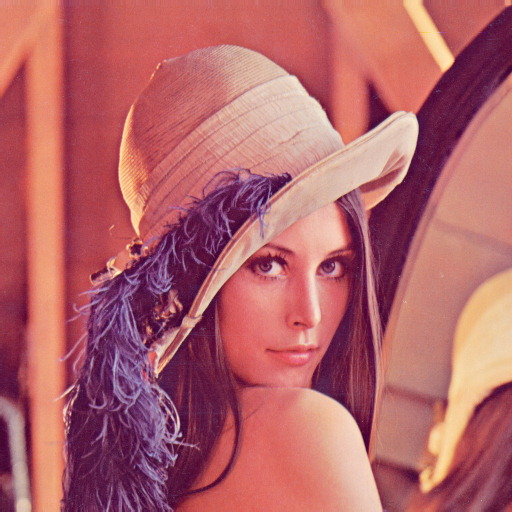

In [5]:
cv2_imshow(lena)

##### Задача 4 (3 балла)

Поменяйте местами левую верхнюю и правую нижнюю четвертинки изображения **lena** и отобразите результат на экран.

In [ ]:
half = lena.shape[0] // 2
lena_swapped = lena.copy()
lena_swapped[half:, half:, :], lena_swapped[:half, :half, :] = \
                        lena[:half, :half, :], lena[half:, half:, :]

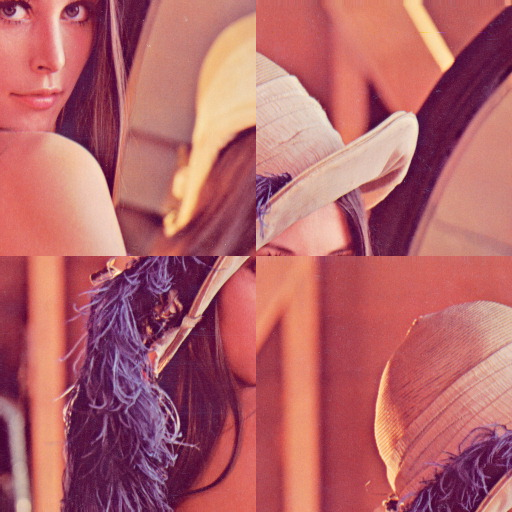

In [ ]:
cv2_imshow(lena_swapped)

##### Задача 5 (3 балла)

Усредните значения всех трех цветовых каналов **lena** в каждый из каналов итогового изображения **lena_gray_my**.

In [ ]:
lena_gray_my = np.repeat(np.mean(lena, axis=2)[:, :, np.newaxis], 3, axis=2)

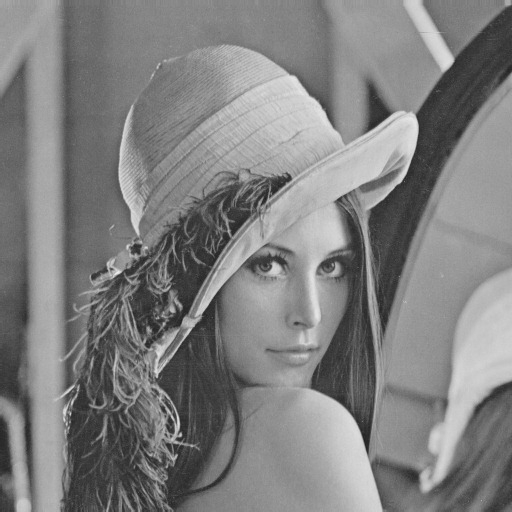

In [ ]:
cv2_imshow(lena_gray_my)

##### Задача 6 (3 балла)

Переведите исходное цветное изображение **lena** в изображение в градациях серого с помощью функции cvtColor. (**lena_gray_cvt**). Вычислите модуль разности между изображениями **lena_gray_my** и **lena_gray_cvt** и отобразите ее на экране.

In [ ]:
lena_gray_cvt = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)

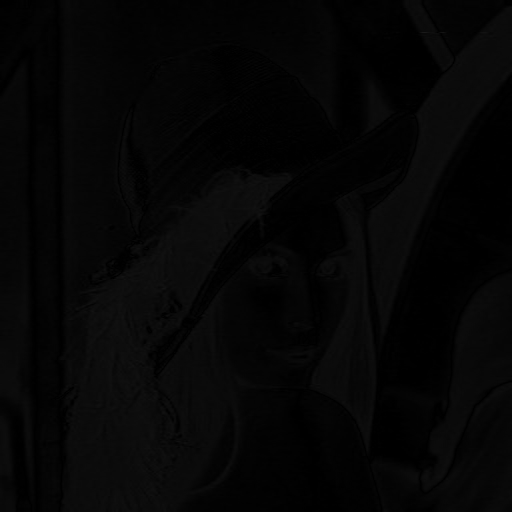

In [ ]:
cv2_imshow(np.abs(lena_gray_my[:, :, 0] - lena_gray_cvt))

In [ ]:
print(f"Maxumum difference: {np.max(np.abs(lena_gray_my[:, :, 0] - lena_gray_cvt)):.2f}")
print(f"Average difference: {np.mean(np.abs(lena_gray_my[:, :, 0] - lena_gray_cvt)):.2f}")

Maxumum difference: 26.00
Average difference: 5.70


##### Задача 7 (3 балла)

Переведите исходное изображение **lena** из RGB в HSV. Установите значения S и V в максимум для всех пикселей изображения. Полученное изображение переведите обратно в RGB. Отобразите результат.

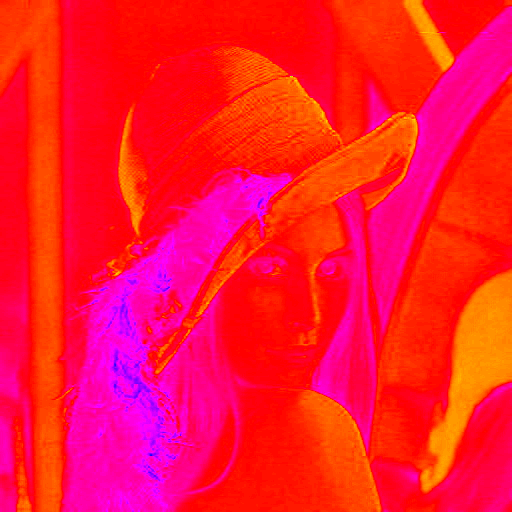

In [ ]:
hsv = cv2.cvtColor(lena, cv2.COLOR_BGR2HSV)
hsv[:, :, 1:] = 255
cv2_imshow(cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR))

##### Задача 8 (3 балла)
Переведите изображение **lena** в одно из цветовых пространств (cvtColor) с выделенной координатой яркости (HSV, HSL, HSB, CIE Lab), инвертируйте яркостную составляющую, переведите обратно в RGB. Отобразите результат.

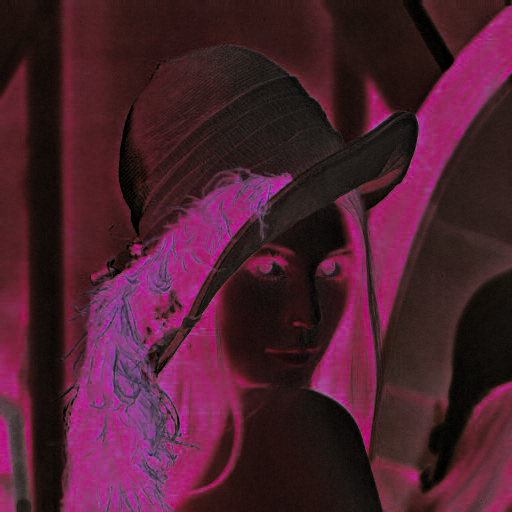

In [ ]:
hsv2 = cv2.cvtColor(lena, cv2.COLOR_BGR2HSV)
hsv2[:, :, 2] = 255 - hsv2[:, :, 2]
cv2_imshow(cv2.cvtColor(hsv2, cv2.COLOR_HSV2BGR))

##### Задача 9 (3 балла)

По цветному изображению **lena** на входе сгенерируйте 6 цветных изображений, полученных путем перестановки значений цветовых каналов r, g и b. исходного изображения. Соберите коллаж $3x2$ и отобразите его на экране. 

In [6]:
from itertools import permutations

In [7]:
masks = list(permutations(np.arange(3)))
res = []
for mask in masks:
    res.append(lena[:, :, mask])

res_cat = []
for i in range(0, 6, 2):
    res_cat.append(np.concatenate((res[i], res[i + 1]), axis=1))

final = np.concatenate((res_cat[0], res_cat[1], res_cat[2]))
final = cv2.resize(final, (400, 600))

In [8]:
final.shape

(600, 400, 3)

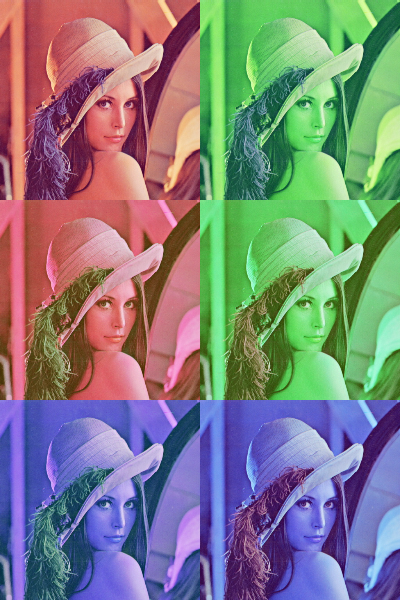

In [ ]:
cv2_imshow(final)

##### Задача 10 (3 балла)
Переведите изображение **lena** из RGB в CIE Lab при помощи встроенной функции OpenCV. Загрузите исходное иображение еще раз и переведите из RGB в CIE Lab самостоятельно с помощью формул (google it). Сравните полученные изображения, построив разницу между ними. (Должен получится ~0)

In [ ]:
lena_lab_cvt = cv2.cvtColor(lena, cv2.COLOR_BGR2Lab)

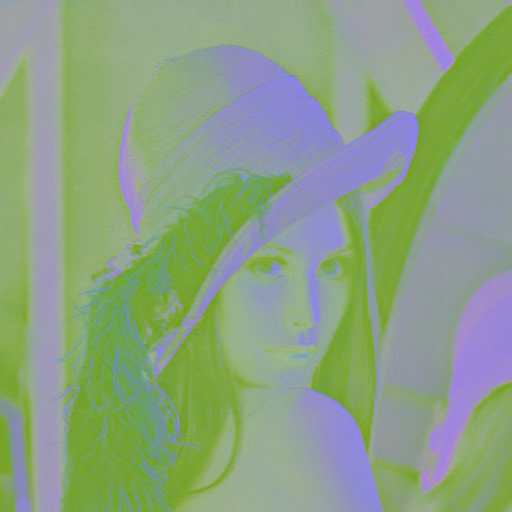

In [ ]:
cv2_imshow(lena_lab_cvt)

In [ ]:
def normalise(image):
    image = image.astype(np.float32) / 255
    return np.where(image <= 0.04045, 
                    image / 12.92, 
                    np.power((image + 0.055) / 1.055, 2.4))

In [ ]:
# lena_lab_my = lena[:, :, ::-1].astype(np.float32) / 255
lena_lab_my = normalise(lena[:, :, ::-1])
mtx = np.array([[0.412453, 0.212671, 0.019334], 
                [0.357580, 0.715160, 0.119193], 
                [0.180423, 0.072169, 0.950227]]).T

In [ ]:
lena_xyz = mtx @ lena_lab_my.reshape(-1, 3).T

In [ ]:
lena_xyz = lena_xyz.T.reshape(512, 512, 3)

In [ ]:
lena_xyz[:, :, 0] /= 0.950456
lena_xyz[:, :, 2] /= 1.088754

In [ ]:
def f(t):
    return np.where(t <= 0.008856, 7.787 * t + 16/116, np.power(t, 1/3))

In [ ]:
L = np.where(lena_xyz[:, :, 1] <= 0.008856,
             903.3 * lena_xyz[:, :, 1], 
             116 * np.power(lena_xyz[:, :, 1], 1/3) - 16)

a = 500 * (f(lena_xyz[:, :, 0]) - f(lena_xyz[:, :, 1])) 
b = 200 * (f(lena_xyz[:, :, 1]) - f(lena_xyz[:, :, 2])) 

L *= 255 / 100
a += 128
b += 128

In [ ]:
lena_lab_my = np.stack((L, a, b), axis=-1)

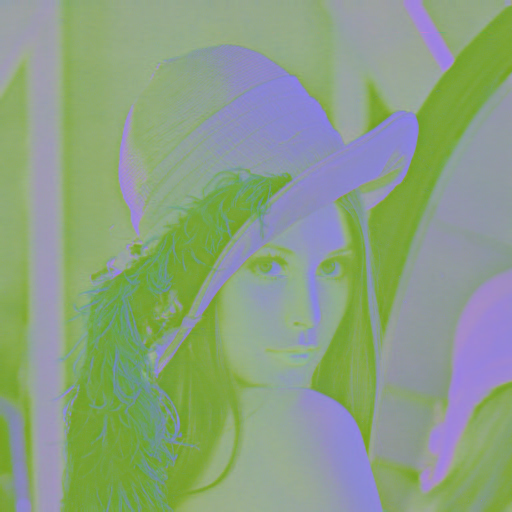

In [ ]:
cv2_imshow(lena_lab_my)

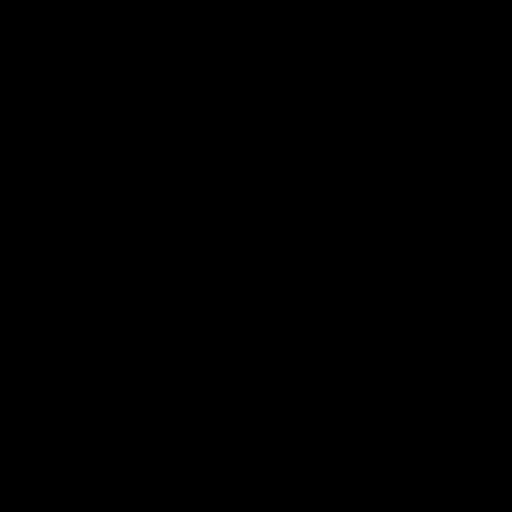

In [ ]:
cv2_imshow(np.abs(lena_lab_cvt - lena_lab_my))

In [ ]:
print(f"Maximum difference: {np.max(np.abs(lena_lab_cvt - lena_lab_my)):.2f}")
print(f"Average difference: {np.mean(np.abs(lena_lab_cvt - lena_lab_my)):.2f}")

Maximum difference: 1.41
Average difference: 0.27
